<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [26]:
df = pd.read_csv('states_edu.csv')
df.head()
df.shape

(1715, 25)

Chosen test: Regression

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
# Rename columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.head()
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [4]:
# Filtered to interesting columns
df = df[['PRIMARY_KEY', 'STATE', 'YEAR', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_4', 'ENROLL_ALL', 'AVG_MATH_4_SCORE']]

df['AVG_MATH_4_SCORE'].isna().sum()

1150

In [5]:
# AVG_MATH_4_SCORE -> remove records without the math score populated
df.dropna(subset=['AVG_MATH_4_SCORE','TOTAL_REVENUE'], inplace=True)
df.isna().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
CAPITAL_OUTLAY_EXPENDITURE      0
ENROLL_4                        0
ENROLL_ALL                      0
AVG_MATH_4_SCORE                0
dtype: int64

In [6]:
# Checking the shape
df.shape

(440, 14)

In [7]:
# Standardization fo some of the expenditure columns
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE']/df['ENROLL_ALL'] 
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE']/df['ENROLL_ALL'] 
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE']/df['ENROLL_ALL'] 
df['CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT'] = df['CAPITAL_OUTLAY_EXPENDITURE']/df['ENROLL_ALL'] 
df.head()

,PRIMARY_KEY,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,ENROLL_4,ENROLL_ALL,AVG_MATH_4_SCORE,TOTAL_EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,174053.0,57948.0,731634.0,208.0,3.627221,2.025197,1.004650,0.237896
2,1992_ARIZONA,ARIZONA,1992,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,609114.0,55433.0,673477.0,215.0,5.050774,2.132082,1.496312,0.904432
3,1992_ARKANSAS,ARKANSAS,1992,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,145212.0,34632.0,441490.0,210.0,3.948044,2.184247,1.095128,0.328913
4,1992_CALIFORNIA,CALIFORNIA,1992,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,2044688.0,418418.0,5254844.0,208.0,5.164536,2.732512,1.621537,0.389105
5,1992_COLORADO,COLORADO,1992,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,364760.0,50648.0,612635.0,221.0,5.329154,2.680986,1.691007,0.595395


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [8]:
# Selecting the feature that I am interesed in int
df_grade4_math = df[['INSTRUCTION_EXPENDITURE', 'FEDERAL_REVENUE', 'ENROLL_4', 'TOTAL_EXPENDITURE_PER_STUDENT', 'AVG_MATH_4_SCORE']].reset_index(drop=True)
# Resetting the index
df_grade4_math.head()

,INSTRUCTION_EXPENDITURE,FEDERAL_REVENUE,ENROLL_4,TOTAL_EXPENDITURE_PER_STUDENT,AVG_MATH_4_SCORE
0,1481703.0,304177.0,57948.0,3.627221,208.0
1,1435908.0,297888.0,55433.0,5.050774,215.0
2,964323.0,178571.0,34632.0,3.948044,210.0
3,14358922.0,2072470.0,418418.0,5.164536,208.0
4,1642466.0,163253.0,50648.0,5.329154,221.0


Final feature list: INSTRUCTION_EXPENDITURE, FEDERAL_REVENUE, ENROLL_4, TOTAL_EXPENDITURE_PER_STUDENT

Feature selection justification: The reason why I chose these features was to keep my initial experiement to a limted number of features and I felt that number of students and the expenditure on kids has a significant impact on the score of students. 

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 4th grade math scores')

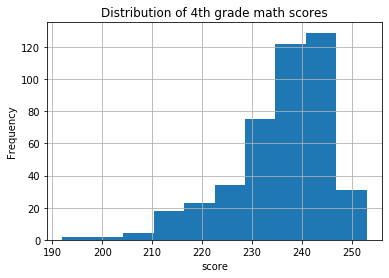

In [9]:
# Plotting average 4th grade math score
df_grade4_math.AVG_MATH_4_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade math scores')

**Getting a general idea of the distribution of 4th grade math scores -> The Average 4th grade math scores seem to be left skewed**

Visualization 2

Text(0, 0.5, '4th grade math score')

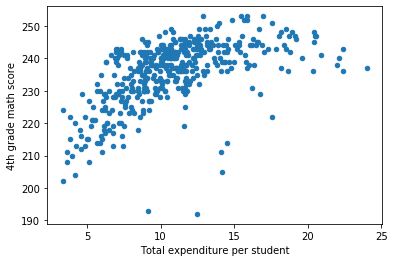

In [10]:
df_grade4_math.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT',y='AVG_MATH_4_SCORE')
plt.xlabel('Total expenditure per student')
plt.ylabel('4th grade math score')

**Seeing if there is an impact of expenditure on student's score -> More expenditure seems to yield higher scores**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_grade4_math[['INSTRUCTION_EXPENDITURE', 'FEDERAL_REVENUE', 'ENROLL_4', 'TOTAL_EXPENDITURE_PER_STUDENT']]
y = df_grade4_math['AVG_MATH_4_SCORE']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [17]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [18]:
# create your model here
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

Text(0, 0.5, '4th grade math score')

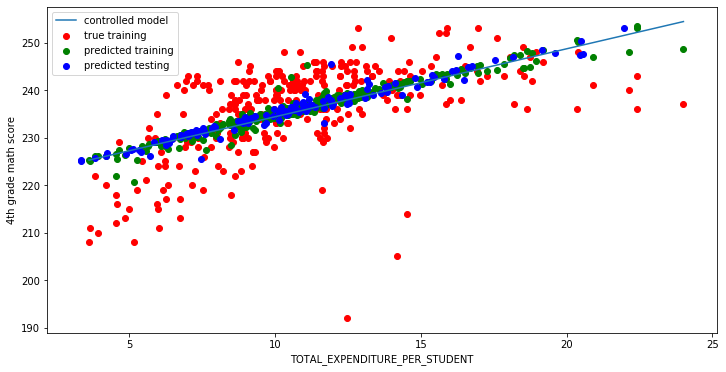

In [24]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('4th grade math score')

<h2> Summary </h2>

**The main intention behind the process was to understand the general structure of a machine leaning process. I wanted to analyze what the best predictors were for the average 4th grade math scores. There were 25 columns in the condensed dataset which contained many null values. To keep the process simple and create a baseline I wanted to remove the rows which null for the features I was interesed in. The features I was interested in were INSTRUCTION_EXPENDITURE, FEDERAL_REVENUE, ENROLL_4 and TOTAL_EXPENDITURE_PER_STUDENT as I felt these would have some predictive power. The model's outcome in predicting 4th grade math score based on Total expenditure per student had a positive correlation.**